# 1. Data Source and Contents

# Setting up the notebook

In [26]:
# Connect to google drive

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
# Read dataset

data = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [29]:
# Check dataset

data.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


# Import all necessary packages

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# Split dataset into training and testing dataset

In [31]:
# Create training dataset 

train_set = data[data['flag'] == 'train']

train_set.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


In [32]:
# Create testing dataset

test_set = data[data['flag'] == 'test']

test_set.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. 0-8,a. Low,b. income,a. 0-25,test,0
32562,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,test,0
32563,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,test,1
32564,b. 31-40,b. Mid - Low,c. High,c. > 0,b. Mid,b. 9-12,b. Mid,b. income,e. 40-55,test,1
32565,a. 0-30,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,a. 0-25,test,0
32566,a. 0-30,a. Low,b. Mid,a. = 0,c. High,a. 0-8,a. Low,b. income,c. 31-35 & 61-70,test,0
32567,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,b. 26-30 & 71-100,test,0
32568,b. 31-40,e. High,c. High,c. > 0,c. High,e. 15+,e. High,b. income,c. 31-35 & 61-70,test,1
32569,b. 31-40,a. Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,b. income,a. 0-25,test,0
32570,a. 0-30,c. Mid - Mid,c. High,a. = 0,c. High,a. 0-8,a. Low,b. income,e. 40-55,test,0


In [33]:
# Select the independant and dependant variables

X_train = pd.get_dummies(train_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_train=train_set['y']
X_test=pd.get_dummies(test_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_test=test_set['y']

# 2. Finding Optimal Value of a key Ensemble Method Hyper-parameter

# Import all necessary packages

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [35]:
accuracy_test = []
auc_test = []

# set the number of estimators from 0 to 100:
for n in range (1, 101):
    model = RandomForestClassifier(n_estimators=n, max_features='auto',random_state=101)
    model.fit(X_train,y_train)

    # set a prediction for the default dataset
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # calculate the accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # append to the lists
    accuracy_test.append(round(accuracy,5))
    auc_test.append(round(auc,5))

# Accuracy VS. n_estimators


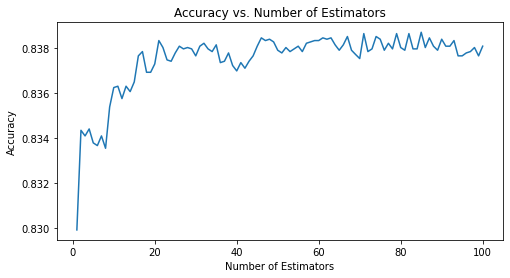

In [36]:
plt.figure(figsize = (8,4))

list = np.arange(1,101)
plt.plot(list, accuracy_test)
plt.title("Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

plt.show()

# AUC Vs. n_estimators

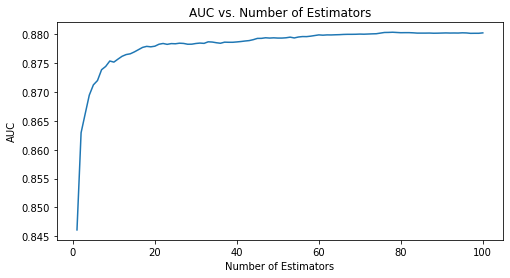

In [37]:
plt.figure(figsize = (8,4))

list = np.arange(1,101)
plt.plot(list, auc_test)
plt.title("AUC vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")

plt.show()

# 3. Building a Random Forest Model

# Encoding

In [38]:
# Create Ordinal Encoder 

oe = preprocessing.OrdinalEncoder()

In [39]:
# Encode training dataset

oe.fit(X_train)
X_train= oe.transform(X_train)
X_train= pd.DataFrame(X_train)

X_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [40]:
# Encode testing dataset 
oe.fit(X_test)
X_test= oe.transform(X_test)
X_test= pd.DataFrame(X_test)

X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


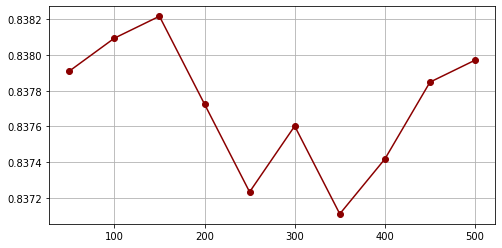

In [41]:
#Build Random Forest Model
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for tree in n_estimator:
  model=RandomForestClassifier(n_estimators=tree,random_state=101)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  accuracy=np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(results,n_estimator).plot(color='darkred',marker='o')
plt.grid()

plt.show()

# 4. Building AdaBoost, Gradient Boost (classifier) and XGB Model

# Ada Boost Model

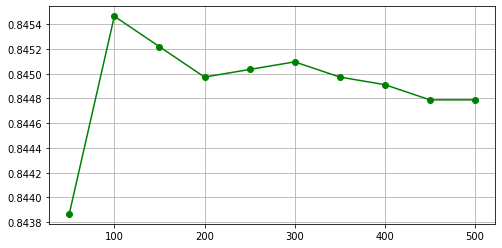

In [59]:
#Build AdaBoost Model 
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for tree in n_estimator:
  model=AdaBoostClassifier(n_estimators=tree,random_state=101)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  accuracy=np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(results,n_estimator).plot(color='green',marker='o')
plt.grid()

plt.show()

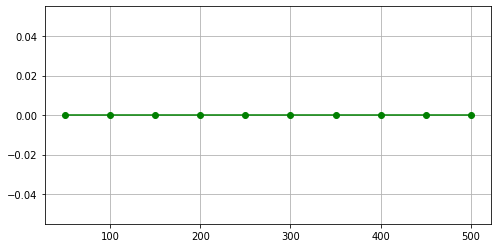

In [49]:
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for tree in n_estimator:
  model=AdaBoostClassifier(n_estimators=tree,random_state=101)
  model.fit(X_train,y_train)
  y_proba = model.predict_proba(X_test)[:, 1]

  auc = roc_auc_score(y_test, y_proba)
  results.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(results,n_estimator).plot(color='green',marker='o')
plt.grid()

plt.show()

# Gradient Boost

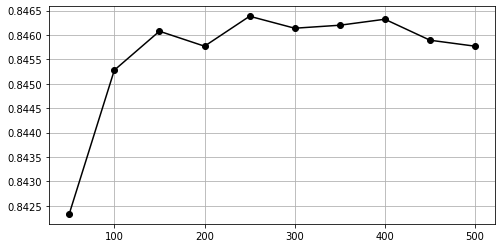

In [43]:
#Build Gradient Boost Model
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for tree in n_estimator:
  model=GradientBoostingClassifier(n_estimators=tree,random_state=101)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  accuracy=np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(results,n_estimator).plot(color='black',marker='o')
plt.grid()

plt.show()

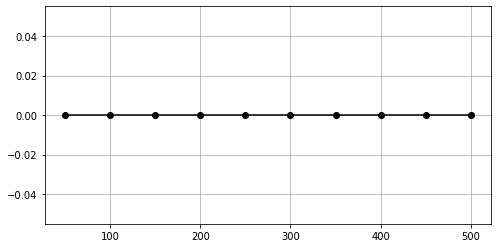

In [51]:
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for tree in n_estimator:
  model=GradientBoostingClassifier(n_estimators=tree,random_state=101)
  model.fit(X_train,y_train)
  y_proba = model.predict_proba(X_test)[:, 1]

  auc2 = roc_auc_score(y_test, y_proba)
  results.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(results,n_estimator).plot(color='black',marker='o')
plt.grid()

plt.show()

# XGB Classifiers

In [44]:
# Import package for XGBoost Model 

from xgboost import XGBClassifier

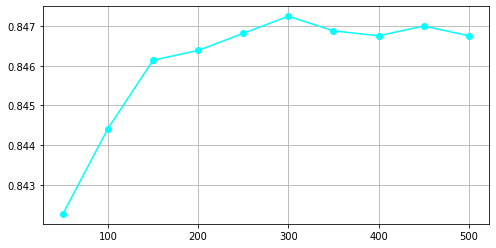

In [45]:
#Build XGB Model
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for tree in n_estimator:
  model=XGBClassifier(n_estimators=tree,random_state=101)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  accuracy=np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(results,n_estimator).plot(color='cyan',marker='o')
plt.grid()

plt.show()

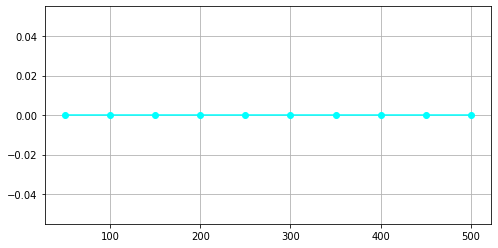

In [52]:
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for tree in n_estimator:
  model=XGBClassifier(n_estimators=tree,random_state=101)
  model.fit(X_train,y_train)
  y_proba = model.predict_proba(X_test)[:, 1]

  auc3 = roc_auc_score(y_test, y_proba)
  results.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(results,n_estimator).plot(color='cyan',marker='o')
plt.grid()

plt.show()

# 5. Compare Performance

# Calculate performance across Models 

In [60]:
# I kept getting errors for this part. Any help would be much appreciated

scores_df = pd.DataFrame({"Random Forest": [accuracy, auc],
                          "AdaBoost": [accuracy, auc],
                          "Gradient Boost": [accuracy, auc2],
                          "XGB": [accuracy, auc3]},
                         index=["Accuracy", "AUC"])

NameError: ignored